In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mcol
import astropy.units as u
import scipy.stats as sts
from misc import * 

plt.style.use('./presentation.mplstyle')

In [2]:
sources = pd.read_csv('v1saga_dwarfs.csv')
print(sources.shape)

(6337, 26)


In [3]:
channels = {'g':mcm.cividis,'r':mcm.viridis,'i':mcm.inferno,'z':mcm.Greys_r}
griz_col = ['tab:blue','tab:green','tab:orange','tab:red']

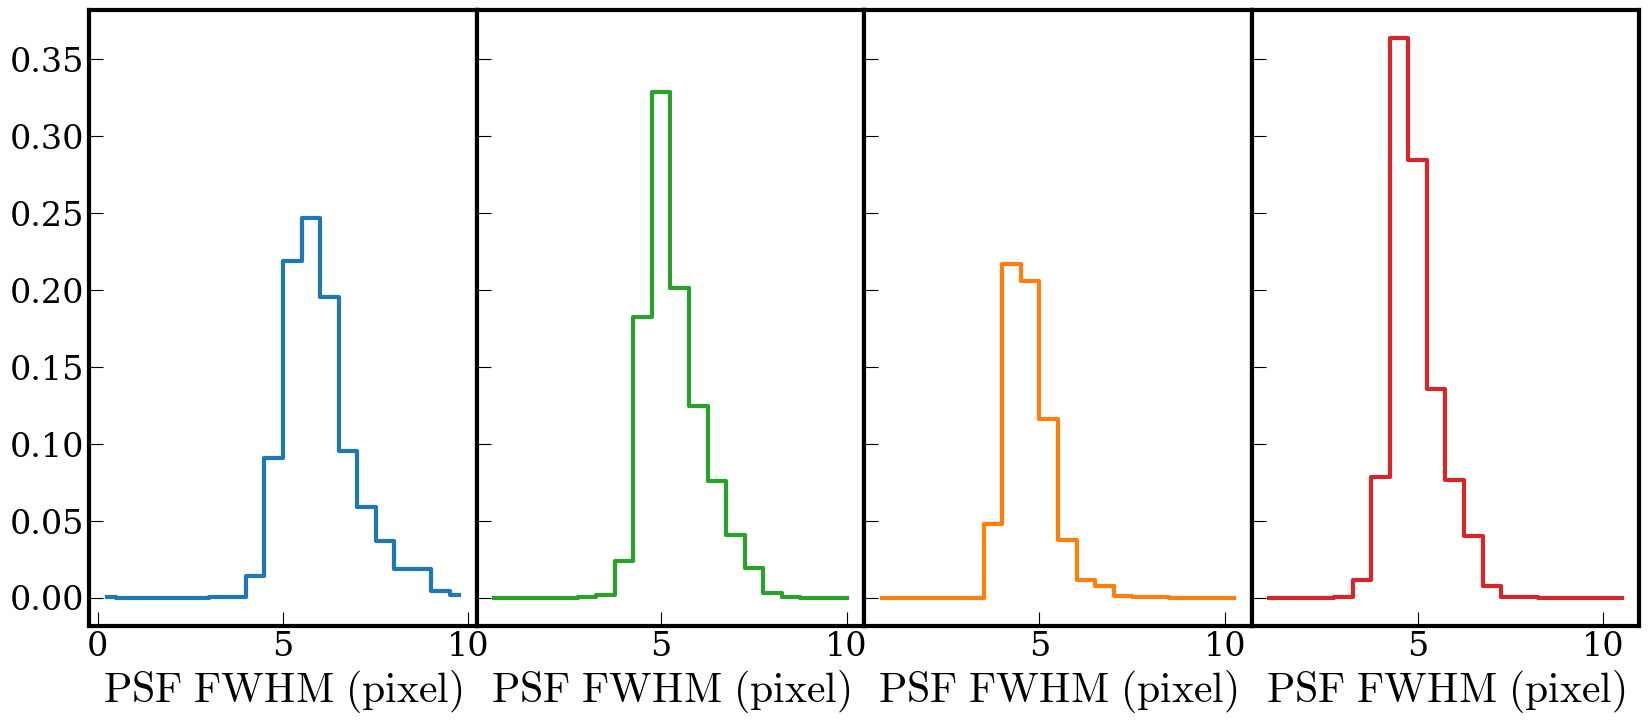

In [5]:
fig,ax=plt.subplots(1,4,figsize=(20,8),sharey='row',sharex='col')

psf_bins = np.linspace(0,10,21)

for i,k in enumerate(channels):

    bin_sat, bin_edg = np.histogram(sources['psfsize_'+k]/0.262,bins=psf_bins)
    bin_edg+=0.5*(bin_edg[1]-bin_edg[0])
    ax[i].step(bin_edg[:-1],bin_sat/len(sources['ind']),c=griz_col[i],lw=3,where='mid')

    #ax[i].text(1.25,3,r'${\it '+k+'}$',fontsize=44)
    ax[i].set_xlabel(r'$PSF\ FWHM\ (pixel)$',fontsize=30)
#ax[1,0].set_ylabel( r'$CCF$',fontsize=40)
        
plt.subplots_adjust(wspace=0.0,hspace=0.0)
plt.savefig('PSFdistributions.pdf',bbox_inches='tight')


In [3]:
##def elvesSAT_Re(M,a=1.077,b=0.246): return a + b*M   #returns log(reff/pc)
#def elvesFLD_Re(M,a=0.665,b=0.296): return a + b*M   #returns log(reff/pc)
#def kim_Re(M,a=-1.68,b=0.239): return a + b*M
#def danieli_Re(M,a=-1.93,b=0.23): return a + b*M

rd2deg = (180*3600)/np.pi

Mr_sol = 4.65
rho = [1.077,0.246]
gamma = [-0.606,1.098]

print(np.log10(rd2deg))
def reff(mag,sfb): return np.sqrt(np.power(10,0.4*(sfb-mag))/(2*np.pi))
def sfb(mag,reff): return mag + 2.5*np.log10(2*np.pi*reff**2)
def abs_mag(M,col,g=gamma): return 2.5*(g[1]*col+g[0]-M) + Mr_sol
def Re(M,p=rho): return p[0] + p[1]*M   #returns log(reff/pc)
def app_mag(M,col,D): return abs_mag(M,col) + 5*(D+5) #needs D/Mpc

def mst_phot(sfb,col): return 1.968503937*(1.297*col +1.165 +np.log10(np.pi*rd2deg*rd2deg)-0.4*sfb)

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.27)

5.314425133176459


In [7]:
#avail = np.where((zspec>0)&(zspec<0.1)&(mst>0)&(sfbr>22)&(mst<10)&(g_r<1)&(rmag<20.7))[0]

zdist = cosmo.comoving_distance(zspec)
dst = np.log10(zdist.value)
print(dst)

reffr = reff(rmag,sfbr)
#print(reff(rmag[avail],sfbr[avail]))

[2.7286335  2.80578862 2.80876753 ... 3.07578219 3.24916815 3.30382409]


14467


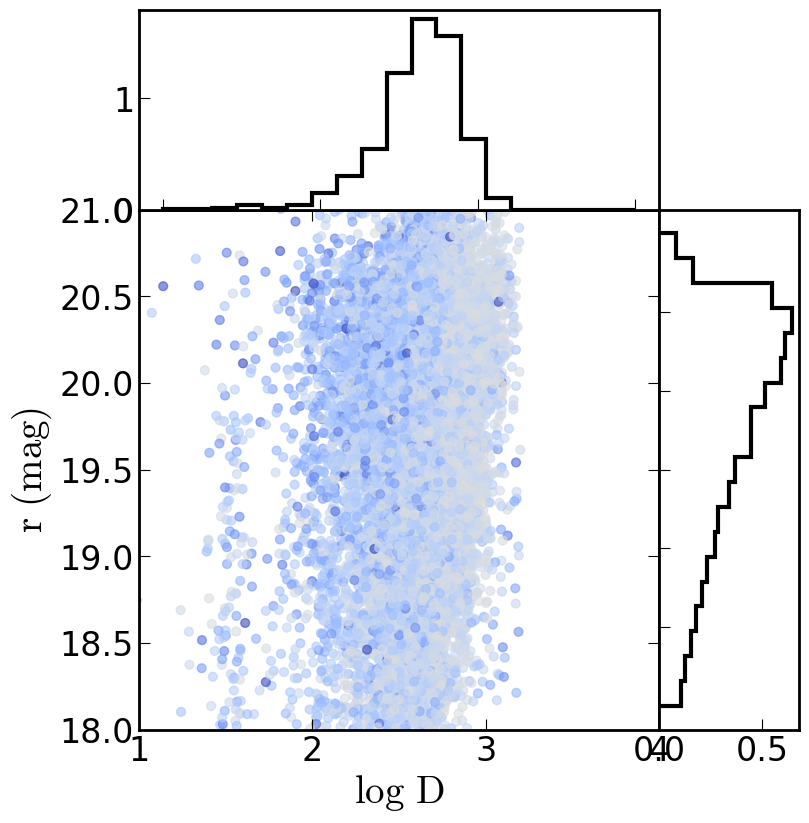

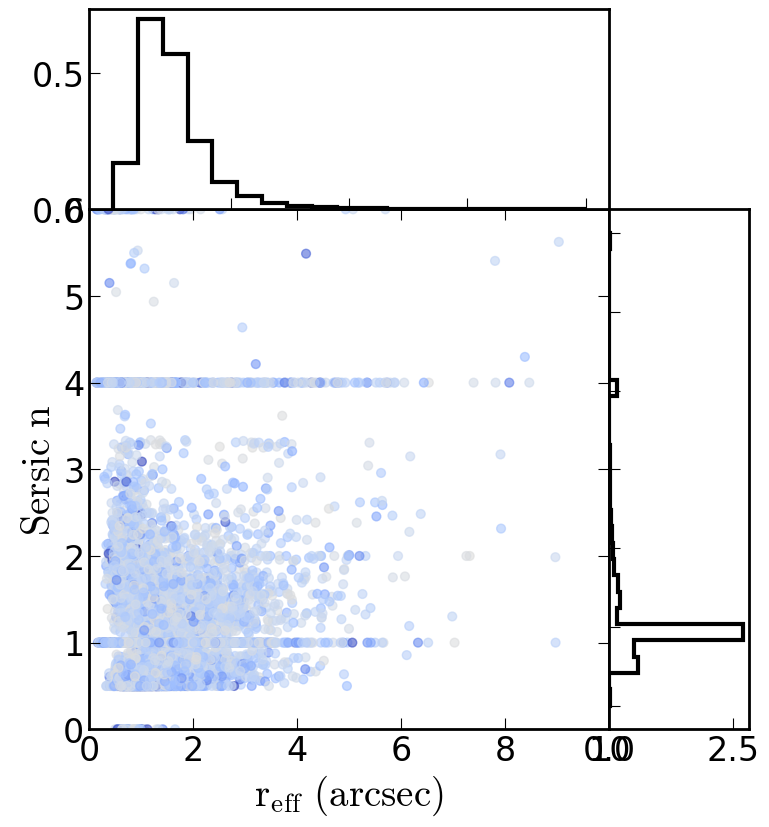

In [18]:
#avail = np.where((zspec>0)&(zspec<0.1)&(rmag<21)&(g_r<0.5))[0]
avail = np.where((g_r<0.5)&(rmag>18)&(dst<3.2))[0]
print(len(avail))

scatter_hists(dst[avail],rmag[avail],Xbins=np.linspace(1,4,20),Ybins=np.linspace(18,21,20),Xlabel=r'$log\ D$',Ylabel=r'$r\ (mag)$',Z=g_r[avail],Zbins=[0,1])

scatter_hists(reffr[avail],sersic[avail],Xbins=np.linspace(0,10,20),Ybins=np.linspace(0,6,30),Xlabel=r'$r_{\rm eff}\ (arcsec)$',Ylabel='$Sersic\ n$',Z=g_r[avail],Zbins=[0,1])


In [19]:
import csv

ra = np.genfromtxt('saga-dr3-tableC2.txt',usecols=3)
dec = np.genfromtxt('saga-dr3-tableC2.txt',usecols=4)
 
# opening the csv file in 'w+' mode
file = open('saga_dwarfs.csv', 'w+', newline ='')
 
# writing the data into the file
with file:    
    write = csv.writer(file)
    write.writerow(["RA","DEC"])
    write.writerows([[ra[j],dec[j]] for j in avail])

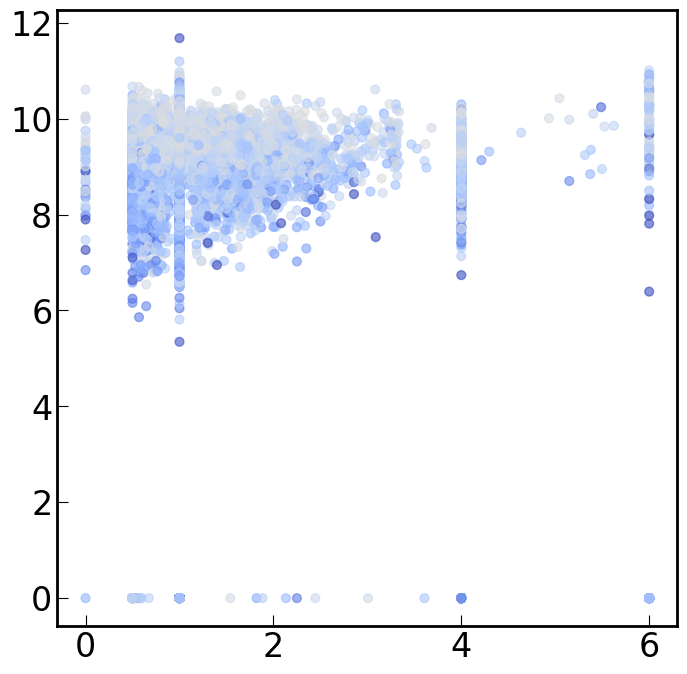

In [14]:
fig,ax=plt.subplots(figsize=(8,8))

ax.scatter(sersic[avail],mst[avail],alpha=0.6,s=40,c=g_r[avail],cmap=mcm.coolwarm,vmin=0,vmax=1)


In [11]:
def linear(X,A): return A[0]+A[1]*X

-0.20689573982506992 0.4062006362420963


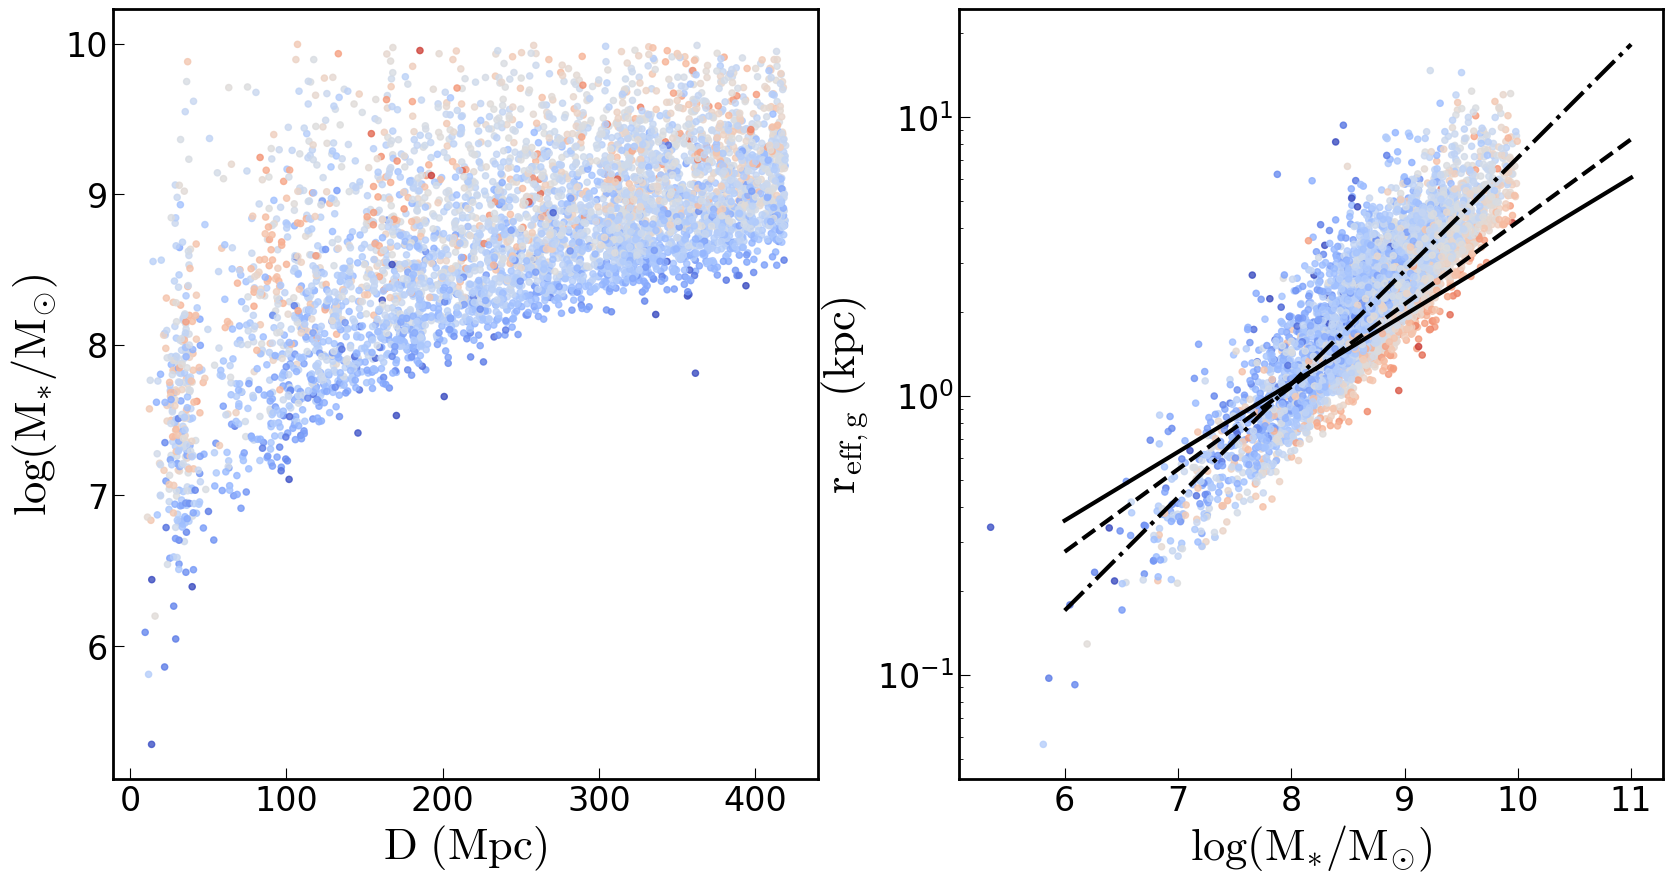

In [36]:
fig,ax=plt.subplots(1,2,figsize=(20,10))

mst_arr = np.linspace(6,11,11)
rph = 1e3*(reffr[avail]*zdist[avail].value)/rd2deg

ax[0].scatter(zdist[avail],mst[avail],alpha=0.8,s=20,c=g_r[avail],cmap=mcm.coolwarm,vmin=0,vmax=1)
ax[1].scatter(mst[avail],rph,alpha=0.8,s=20,c=g_r[avail],cmap=mcm.coolwarm,vmin=0,vmax=1)
        
res = sts.linregress(mst[avail],np.log10(rph))
p0 = [res.intercept,res.slope]
print(p0[0]+3,p0[1])

ax[1].plot(mst_arr,np.power(10,linear(mst_arr,p0)),color='black',ls='-.',lw=3)
ax[1].plot(mst_arr,np.power(10,Re(mst_arr)-3),color='black',lw=3)
ax[1].plot(mst_arr,np.power(10,Re(mst_arr,[0.665,0.296])-3),color='black',lw=3,ls='--')
#ax[1].plot(mst_arr,np.power(10,danieli_Re(mst_arr)),color='black',lw=3,ls='-.')

ax[1].set_yscale('log')
#lsbg_prop[:,1] = np.power(10,elves_Re(lsbg_solve[:,0])-3)

ax[0].set_xlabel(r'$D\ (Mpc)$',fontsize=32)
ax[0].set_ylabel(r'$log(M_{\ast}/M_{\odot})$',fontsize=32)

ax[1].set_xlabel(r'$log(M_{\ast}/M_{\odot})$',fontsize=32)
ax[1].set_ylabel(r'$r_{\rm eff,g}\ (kpc)$',fontsize=32)

plt.savefig('SAGAmass_distance.pdf',bbox_inches='tight')



In [8]:
print(np.log10(rd2deg)+0.655-6)

-0.030574866823540603


[8.06620893 2.32480246]


/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0vlgf3/T/ipykernel_30622/3074085086.py:23: UserWarning: The following kwargs were not used by contour: 'lw', 'ls', 'aspect'
  ax[0].contour(np.transpose(sfb_arr[0,:,:]), levels=[rmag[lsbg_id]],lw=4,ls='--', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0vlgf3/T/ipykernel_30622/3074085086.py:24: UserWarning: The following kwargs were not used by contour: 'lw', 'ls', 'aspect'
  ax[1].contour(np.transpose(sfb_arr[0,:,:]), levels=[rmag[lsbg_id]],lw=4,ls='-.', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0vlgf3/T/ipykernel_30622/3074085086.py:28: UserWarning: The following kwargs were not used by contour: 'lw', 'ls', 'aspect'
  ax[0].contour(np.transpose(sfb_arr[1,:,:]), levels=[np.log10(reffr[lsbg_id])],lw=4,ls='--', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0

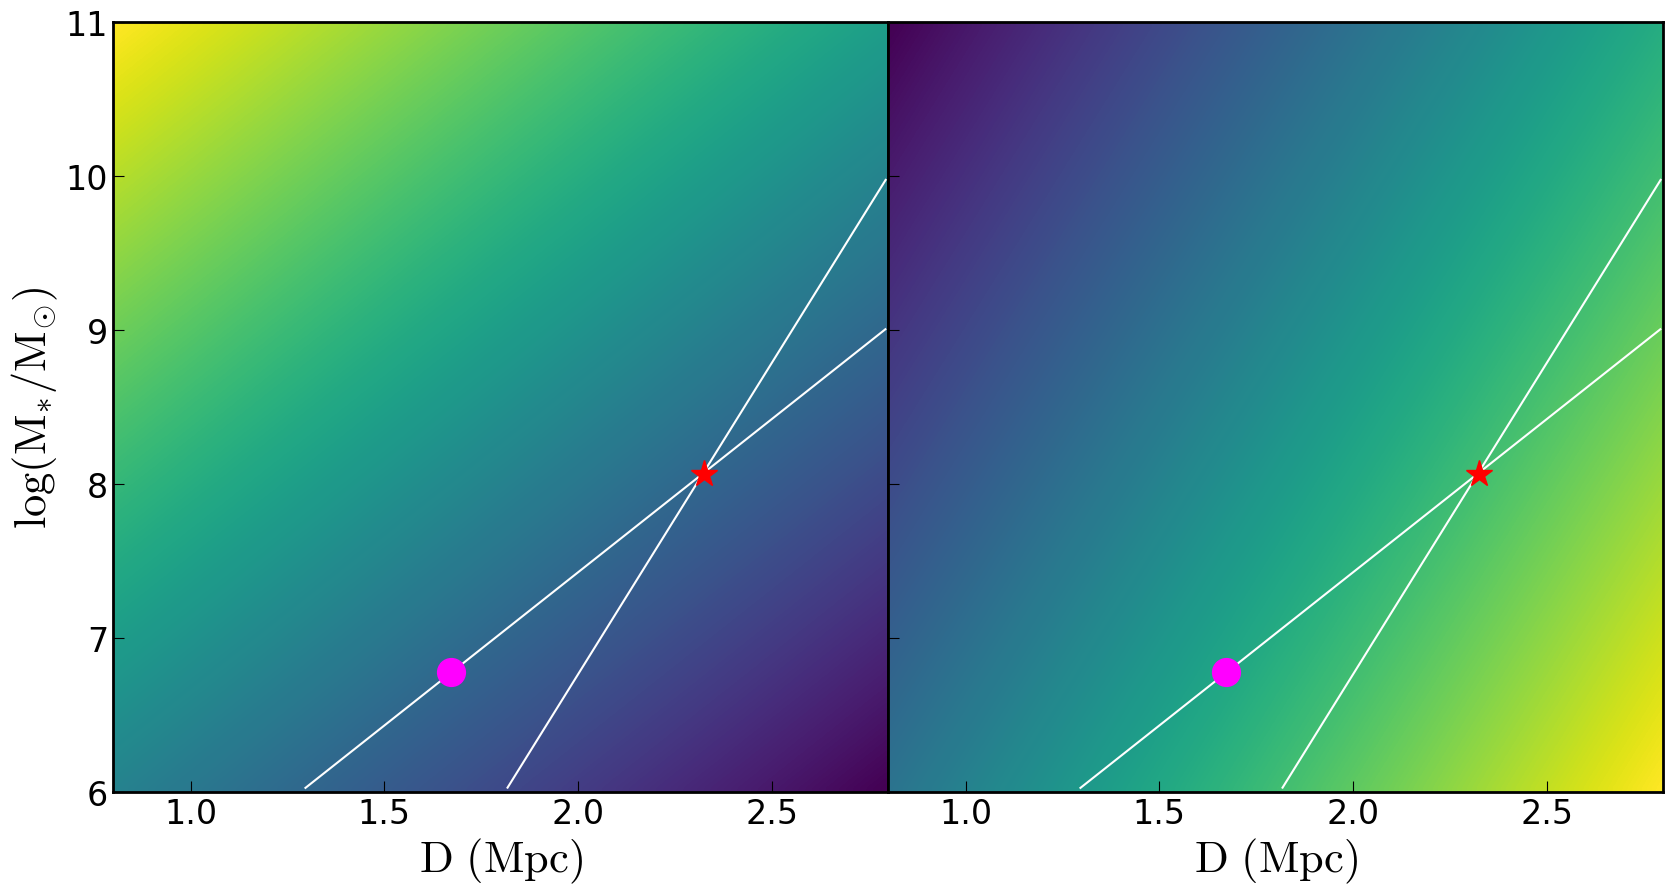

In [16]:
#def sfb_mag_degen(M,g_i,Re): return abs_mag(M,g_i) +10 + 2.5*np.log10(np.pi*rd2deg*rd2deg)+5*Re

fig,ax=plt.subplots(1,2,figsize=(20,10),sharey=True)

sfb_arr = np.zeros((2,200,100))
mst_arr = np.linspace(6,11,100)
D_arr = np.linspace(0.8,2.8,200)

lsbg_id=npr.choice(avail)

for j in range(100):
    for i in range(200):
                sfb_arr[0,i,j] = app_mag(mst_arr[j],g_r[lsbg_id],D_arr[i])

                sfb_arr[1,i,j] = np.log10(rd2deg)-D_arr[i] + Re(mst_arr[j])-6

a = np.array([[-2.5,5], [rho[1],-1]])
b = np.array([rmag[lsbg_id] - 2.5*gamma[1]*g_r[lsbg_id]-2.5*gamma[0]-Mr_sol-25, np.log10(reffr[lsbg_id])+6-np.log10(rd2deg)-rho[0]])
x = np.linalg.solve(a, b)
print(x)

im = ax[0].imshow(np.transpose(sfb_arr[0,:,:]),cmap='viridis_r',aspect='auto',extent = [0.8,2.8,6,11],origin='lower',interpolation='gaussian')
ax[0].contour(np.transpose(sfb_arr[0,:,:]), levels=[rmag[lsbg_id]],lw=4,ls='--', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
ax[1].contour(np.transpose(sfb_arr[0,:,:]), levels=[rmag[lsbg_id]],lw=4,ls='-.', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')


im = ax[1].imshow(np.transpose(sfb_arr[1,:,:]),cmap='viridis_r',aspect='auto',extent = [0.8,2.8,6,11],origin='lower',interpolation='gaussian')
ax[0].contour(np.transpose(sfb_arr[1,:,:]), levels=[np.log10(reffr[lsbg_id])],lw=4,ls='--', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
ax[1].contour(np.transpose(sfb_arr[1,:,:]), levels=[np.log10(reffr[lsbg_id])],lw=4,ls='-.', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')


ax[0].plot(x[1],x[0],marker='*',color='red',markersize=20)
ax[1].plot(x[1],x[0], marker='*',color='red',markersize=20)

ax[0].plot(dst[lsbg_id],mst[lsbg_id],marker='o',color='fuchsia',markersize=20)
ax[1].plot(dst[lsbg_id],mst[lsbg_id], marker='o',color='fuchsia',markersize=20)

ax[0].set_xlabel(r'$D\ (Mpc)$',fontsize=32)
ax[1].set_xlabel(r'$D\ (Mpc)$',fontsize=32)
ax[0].set_ylabel(r'$log(M_{\ast}/M_{\odot})$',fontsize=32)

plt.subplots_adjust(wspace=0.0)


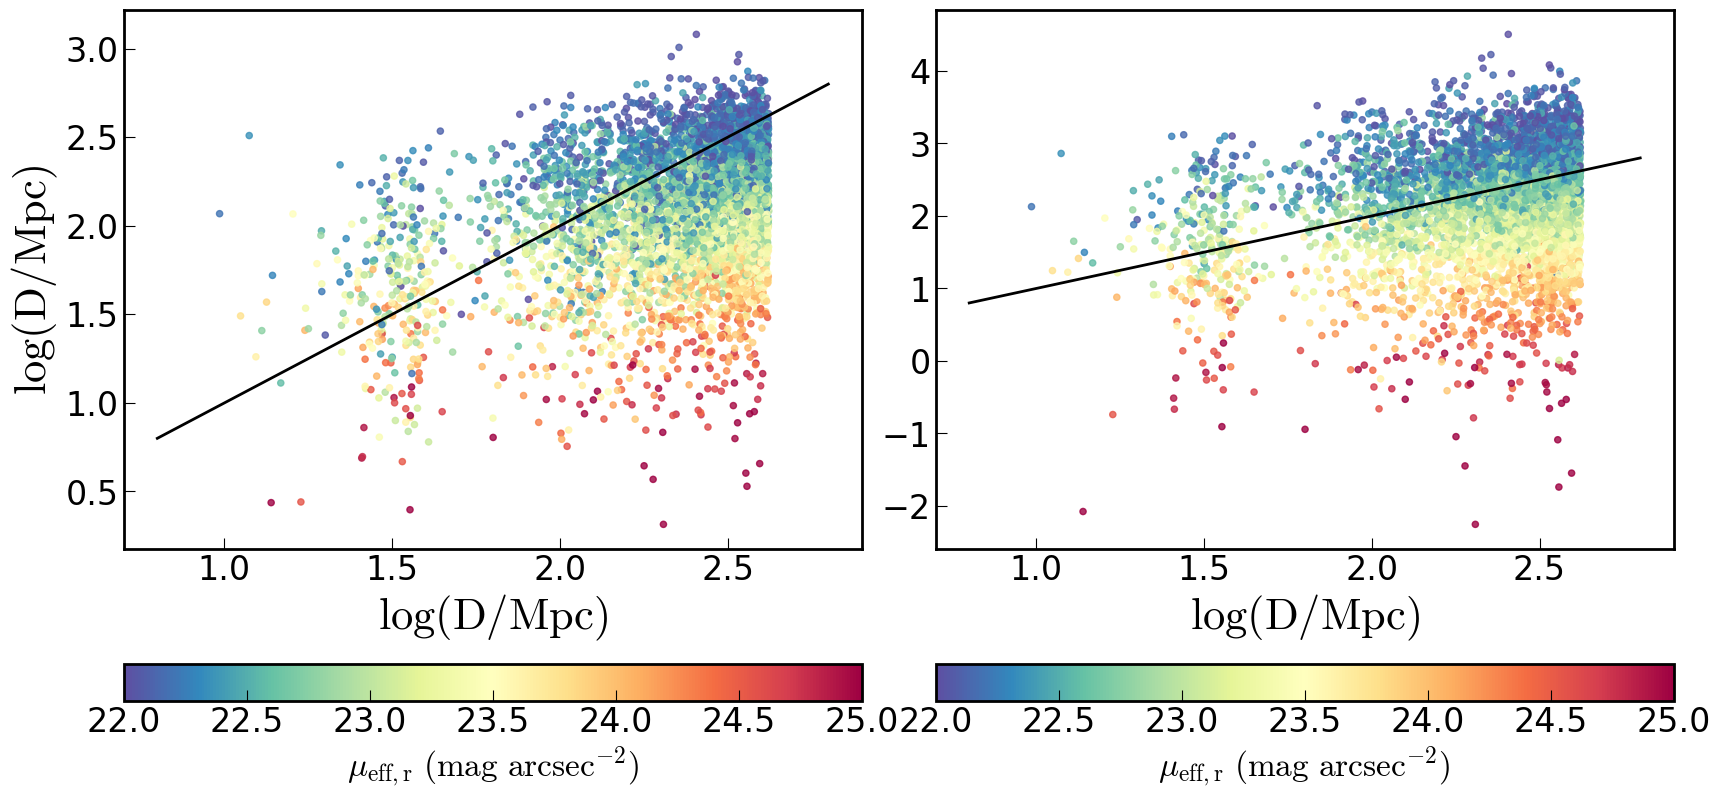

In [37]:
fig,ax=plt.subplots(1,2,figsize=(20,10))

rho_arr = [[0.665,0.296],[-0.23566,0.40928]]

lsbg_solve = np.zeros((len(avail),2))
D_arr = np.linspace(0.8,2.8,100)

for j in range(2):
    n=0
    for k in avail:
        a = np.array([[-2.5,5], [rho_arr[j][1],-1]])
        b = np.array([rmag[k] - 2.5*gamma[1]*g_r[k]-2.5*gamma[0]-Mr_sol-25, np.log10(reffr[k])+6-np.log10(rd2deg)-rho_arr[j][0]])
        
        x = np.linalg.solve(a, b)
        lsbg_solve[n,:] = x[0],x[1]
        n+=1
        
    ax[j].scatter(dst[avail],lsbg_solve[:,1],alpha=0.8,s=20,c=sfbr[avail],cmap=mcm.Spectral_r,vmin=22,vmax=25)

    ax[j].plot(D_arr,D_arr,lw=2,color='black')

    #ax[j].set_xlim((5,500))
    #ax[j].set_xscale('log')
    #ax[j].set_yscale('log')
    ax[j].set_xlabel(r'$log(D/Mpc)$',fontsize=32)
ax[0].set_ylabel(r'$log(D/Mpc)$',fontsize=32)

plt.colorbar(mcm.ScalarMappable(norm=mcol.Normalize(vmin=22,vmax=25), cmap=mcm.Spectral_r), ax=ax[0],orientation='horizontal',label=r'$\mu_{eff,r} \ (mag \ arcsec^{-2})$')
plt.colorbar(mcm.ScalarMappable(norm=mcol.Normalize(vmin=22,vmax=25), cmap=mcm.Spectral_r), ax=ax[1],orientation='horizontal',label=r'$\mu_{eff,r} \ (mag \ arcsec^{-2})$')

plt.subplots_adjust(wspace=0.1)

#plt.savefig('mass_distance.pdf',bbox_inches='tight')

In [38]:
def linear(X,A): return A[0]+A[1]*X[0]+A[2]*X[1]

[22.29136928971518, -1.0184357653296523, 2.080876573369852]


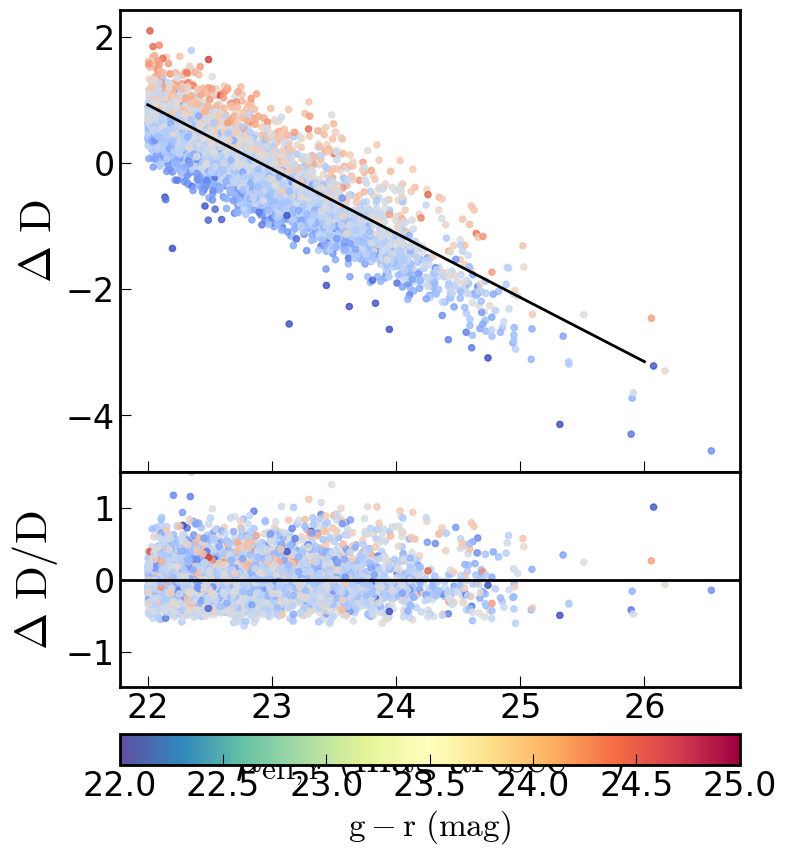

In [39]:
fig,ax=plt.subplots(2,1,figsize=(8,10),sharex=True,height_ratios=[0.6,0.4])

sfb_arr = np.linspace(22,26,100)
del_dst = lsbg_solve[:,1]-dst[avail]

ax[0].scatter(sfbr[avail],del_dst,alpha=0.8,s=20,c=g_r[avail],cmap=mcm.coolwarm,vmin=0,vmax=1)

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[sfbr[k],g_r[k]] for k in avail], del_dst)
p1=[reg.intercept_,*reg.coef_]
print(p1)

#res = sts.linregress()
#p1 = [res.intercept,res.slope]
#print(p1[0],p1[1])

ax[1].scatter(sfbr[avail],del_dst-linear([sfbr[avail],g_r[avail]],p1),alpha=0.8,s=20,c=g_r[avail],cmap=mcm.coolwarm,vmin=0,vmax=1)
ax[0].plot(sfb_arr,linear([sfb_arr,0.5],p1),lw=2,color='black')
ax[1].axhline(0,lw=2,color='black')

plt.colorbar(mcm.ScalarMappable(norm=mcol.Normalize(vmin=22,vmax=25), cmap=mcm.Spectral_r), ax=ax[1],orientation='horizontal',label=r'$g-r\ (mag)$')

#ax[0].set_xlim((2,200))
#ax[0].set_ylim((2,200))
#ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[1].set_ylim((-1.5,1.5))

ax[1].set_xlabel(r'$\mu_{eff,r} \ (mag \ arcsec^{-2})$',fontsize=32)
ax[0].set_ylabel(r'$\Delta\ D$',fontsize=32)
ax[1].set_ylabel(r'$\Delta\ D/D$',fontsize=32)

plt.subplots_adjust(hspace=0.0)

#plt.savefig('distance_calibration.pdf',bbox_inches='tight')


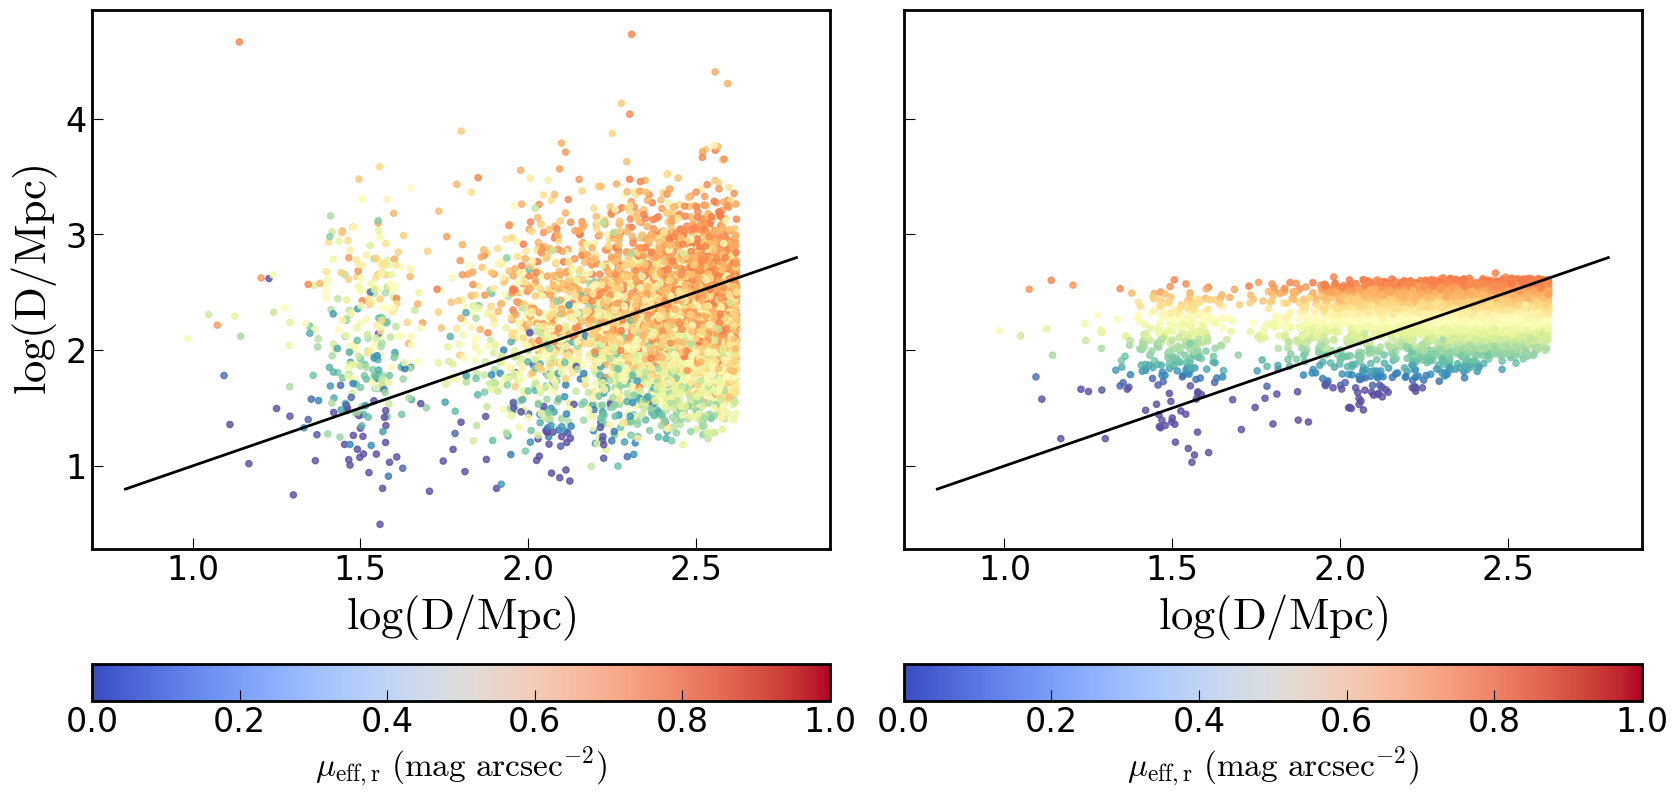

In [40]:
fig,ax=plt.subplots(1,2,figsize=(20,10),sharey=True)

rho_arr = [[0.665,0.296],[-0.1550, 0.3996]]

lsbg_solve = np.zeros((len(avail),2))
D_arr = np.linspace(0.8,2.8,100)

for j in range(2):
    n=0
    for k in avail:
        a = np.array([[-2.5,5], [rho_arr[j][1],-1]])
        b = np.array([rmag[k] - 2.5*gamma[1]*g_r[k]-2.5*gamma[0]-Mr_sol-25, np.log10(reffr[k])+6-np.log10(rd2deg)-rho_arr[j][0]])
        
        x = np.linalg.solve(a, b)
        lsbg_solve[n,:] = x[0],x[1]
        n+=1

    lsbg_solve[:,1]-=p1[0]+p1[1]*sfbr[avail]+p1[2]*g_r[avail]
    ax[j].scatter(dst[avail],lsbg_solve[:,1],alpha=0.8,s=20,c=rmag[avail],cmap=mcm.Spectral_r,vmin=16,vmax=22)

    ax[j].plot(D_arr,D_arr,lw=2,color='black')

    #ax[j].set_xlim((5,500))
    #ax[j].set_xscale('log')
    #ax[j].set_yscale('log')
    ax[j].set_xlabel(r'$log(D/Mpc)$',fontsize=32)
ax[0].set_ylabel(r'$log(D/Mpc)$',fontsize=32)

plt.colorbar(mcm.ScalarMappable(norm=mcol.Normalize(vmin=0,vmax=1), cmap=mcm.coolwarm), ax=ax[0],orientation='horizontal',label=r'$\mu_{eff,r} \ (mag \ arcsec^{-2})$')
plt.colorbar(mcm.ScalarMappable(norm=mcol.Normalize(vmin=0,vmax=1), cmap=mcm.coolwarm), ax=ax[1],orientation='horizontal',label=r'$\mu_{eff,r} \ (mag \ arcsec^{-2})$')

plt.subplots_adjust(wspace=0.1)

#plt.savefig('mass_distance.pdf',bbox_inches='tight')

In [31]:
absM_arr = np.arange(-22,-2,0.5)

def profile_host(absM_bins):
    absM_cts = np.zeros((N_hosts,len(absM_bins)-1))
    Lsat = np.zeros(N_hosts)

    for j in range(N_hosts):
            sat_ind = list(np.where(host_name[j]==sat_host)[0])
            print(len(sat_ind),sat_absR[sat_ind])
            sat_cts, bin_edg = np.histogram(sat_absR[sat_ind],bins=absM_bins)

            bin_cen = bin_edg+0.05
            Lsat[j] = np.sum(sat_cts*np.power(10,-0.4*(bin_cen[:-1]-4.65)))*0.1
            
    return absM_cts,Lsat

In [26]:
sat_lumf,lsat = profile_host(absM_arr)
print(np.shape(sat_lumf))

#sat_lumf,back_lumf = np.cumsum(sat_lumf,axis=1)/lim_absM_cumulat,np.cumsum(back_lumf,axis=1)/lim_absM_cumulat
sat_lumf = sat_lumf/lim_absM_cumulat

4 [-15.9 -15.7 -14.8 -14. ]
2 [-15.9 -12.6]
3 [-17.9 -15.2 -15. ]
3 [-16.6 -16.  -15.1]
2 [-16.9 -13.5]
2 [-17.6 -16.9]
6 [-18.4 -18.4 -17.4 -16.1 -15.1 -14.1]
4 [-17.2 -16.5 -15.3 -14.1]
2 [-15.5 -10.7]
2 [-15.5 -15.4]
2 [-17.8 -15.8]
5 [-18.4 -16.1 -14.6 -13.  -13. ]
1 [-12.1]
4 [-18.4 -15.8 -14.3 -12.9]
7 [-18.8 -17.8 -16.2 -15.  -13.7 -13.2 -13. ]
2 [-14.5 -14. ]
5 [-18.1 -17.6 -17.  -15.8 -14.5]
5 [-18.5 -16.2 -15.2 -15.1 -14.4]
3 [-14.9 -13.5 -12.9]
0 []
3 [-16.1 -16.  -14.2]
1 [-17.2]
3 [-17.5 -17.1 -15.3]
0 []
2 [-18.  -16.8]
10 [-19.4 -17.  -16.  -15.9 -15.8 -15.3 -14.6 -14.1 -13.5 -11.8]
9 [-19.1 -18.8 -17.2 -17.1 -15.7 -15.3 -13.9 -13.8 -13. ]
4 [-16.9 -16.5 -14.6 -14.6]
5 [-15.6 -15.4 -15.2 -15.  -14.8]
4 [-19.7 -16.9 -16.  -15.3]
2 [-15.8 -14.3]
6 [-18.  -16.3 -16.  -15.7 -14.4 -13.2]
5 [-19.5 -18.1 -17.  -15.1 -13.4]
1 [-14.1]
6 [-20.2 -18.5 -17.6 -16.8 -14.9 -12.1]
2 [-19.  -17.1]
(36, 39)


/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0vlgf3/T/ipykernel_38634/1552835964.py:5: RuntimeWarning: invalid value encountered in true_divide
  sat_lumf = sat_lumf/lim_absM_cumulat


In [27]:
print(lsat)

[4.44285550e+07 1.84744865e+07 1.27530911e+08 7.19943735e+07
 4.53893841e+07 1.53299403e+08 4.59615490e+08 1.12055324e+08
 1.11385620e+07 2.19295639e+07 1.27025828e+08 2.10433636e+08
 6.91830971e+05 1.96619728e+08 4.25119794e+08 7.11938703e+06
 3.48822652e+08 2.27617092e+08 9.75258873e+06 0.00000000e+00
 4.92854536e+07 6.91830971e+07 1.49330976e+08 0.00000000e+00
 1.53299403e+08 5.56724007e+08 8.85252623e+08 8.50304897e+07
 5.31441916e+07 7.63825344e+08 2.17431666e+07 1.78049082e+08
 6.66650081e+08 4.36515832e+06 1.43116782e+09 3.44605967e+08]


/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0vlgf3/T/ipykernel_38634/1353219240.py:3: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(host_absK,np.log10(lsat),s=14,c='red')


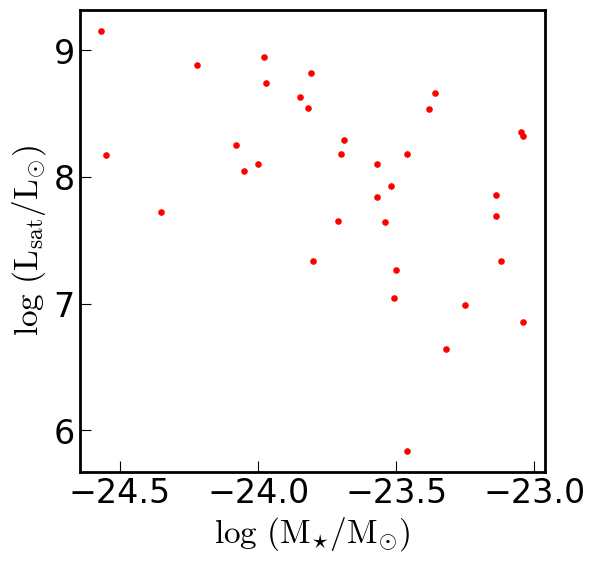

In [28]:
fig,ax=plt.subplots(figsize=(6,6))

ax.scatter(host_absK,np.log10(lsat),s=14,c='red')

'''lsat_nonn = np.where(lsat>0)[0]

mst_arr = np.linspace(9,11,10)
p0,p1=sopt.curve_fit(linear,lvg_i.mst[lsat_nonn],np.log10(lsat[lsat_nonn]))
print(p0,np.sqrt(np.diag(p1)))

ax.plot(mst_arr,linear(mst_arr,*p0),lw=3,c='black')
ax.fill_between(mst_arr,linear(mst_arr,*(p0-np.sqrt(np.diag(p1)))),linear(mst_arr,*(p0+np.sqrt(np.diag(p1)))),color='gray',alpha=0.2)
'''
ax.set_ylabel('$log\ (L_{sat}/L_{\odot})$',fontsize=24)
ax.set_xlabel('$log\ (M_{\star}/M_{\odot})$',fontsize=24)
plt.savefig('satlum_hostmass.pdf',bbox_inches='tight')